In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#References to repository and data loading
repo = 'https://github.com/MarvinLopezOsorio/AnaliticaPredictiva_TrabajoFinal/blob/main/Base%20de%20Datos%20Universidad.xlsx?raw=True'
data = pd.read_excel(repo)
data.head(3)

,Ingreso,Estado,Sexo,Municipio,Edad,Paes,Carrera,Facultad,Segunda carrera,CUM,...,Estado actual,Razonamiento Verbal (DAT- VR),Relaciones Espaciales (DAT - SR),Razonamiento Abstracto (DAT- AR),Aptitud Numérica (DAT - NA),Razonamiento Mecánico (DAT-MR),Rapidez y precisión perceptiva (DAT -CSA),Hábitos,Aprobación,tipo institución
0,2017,ACTIVO,Femenino,Soyapango,23,5.52,Licenciatura en Idiomas con especialidad en la...,Facultad de CC. y Humanidades,NaN,8.4,...,ACTIVO,75,15,20,5,45,5,5,Aprobado,Privado
1,2017,ACTIVO,Femenino,Soyapango,23,4.50,Licenciatura en Ciencias de la Comunicación,Facultad de CC. y Humanidades,NaN,8.6,...,ACTIVO,75,20,15,50,15,5,1,Aprobado,Privado
2,2017,ACTIVO,Femenino,Soyapango,24,3.83,Licenciatura en Idiomas con especialidad en Tu...,Facultad de CC. y Humanidades,NaN,7.6,...,ACTIVO,45,5,10,30,15,5,4,Aprobado,Público


###Data description

The original dataset contains the following variables. A short description and a name are added for a better understanding. Some variables are considered not relevant for the experiment's objective, so are marked as such and removed from the dataset for model building, but stay as part of the dataset for exploratory analysis.

*   Ingreso: year in which the 1st university cycle started, not relevant [year], 
*   Estado: current status of the student, not relevant [status],
*   Sexo: sex of the student [sex], 
*   Municipio: municipality/town of origin of the student [town], 
*   Edad: age of the student when he started [age], 
*   Paes: result of a general knowledge test applied prior to university studies [paes], 
*   Carrera: major in which the student is enrolled [major],
*   Facultad: faculty university [faculty], 
*   Segunda carrera: second major in which the student is enrolled, if any (removed because it's added after the 1st cycle, so has inherently no relation to the prediction [major2], 
*   CUM: accumulated grade from the 1st cycle of studies, if it's greater than 7 the student is approved, otherwise it's considered failed, not relevant [grade], 
*   Porcentaje de avance: current progress of the student on the major, removed because it measures the current progress, is not relevant for predicting failure [progress],
*   Estado actual: current status of the student, this information is duplicated and will be removed [current_status], 
*   Razonamiento Verbal (DAT - VR): psycho-pedagogical test result for Verbal Reasoning [VR],
*   Relaciones Espaciales (DAT - SR): psycho-pedagogical test result for Spatial Reasoning [SR], 
*   Razonamiento Abstracto (DAT - AR): psycho-pedagogical test result for Abstract Reasoning [AR],
*   Aptitud Numérica (DAT - NA): psycho-pedagogical test result for Numeric Aptitude [NA], 
*   Razonamiento Mecánico (DAT - MR): psycho-pedagogical test result for Mechanical Reasoning [MR],
*   Rapidez y precisión perceptiva (DAT - CSA): psycho-pedagogical test result for Perceptive Precision and Speed [CSA], 
*   Hábitos: Amount of bad study habits reported by students by survey [habits], 
*   Aprobación: Approved/failed result of the student in the first cycle [approved],
*   Tipo institución: Type of institution (Public/Private/Not defined) where the student comes from [sch_type]

This new names are added to the dataframe. Also the useless columns were removed.

In [3]:
#Define column labels
col_labels = ['year', 'status', 'sex', 'town', 'age', 'paes', 'major', 'faculty', 'major2', 'grade', 'progress', 
            'current_status', 'VR', 'SR', 'AR', 'NA', 'MR', 'CSA', 'habits', 'approved', 'sch_type']

#Define not needed columns for the experiment
useless_cols = ['major2','status','progress','current_status']

#Define not relevant columns for the classification target
not_relevant_cols = ['year','grade']

#Change column labels and drop useless columns
data.columns = col_labels
data.drop(columns=useless_cols, inplace=True)
data.head(3)

,year,sex,town,age,paes,major,faculty,grade,VR,SR,AR,NA,MR,CSA,habits,approved,sch_type
0,2017,Femenino,Soyapango,23,5.52,Licenciatura en Idiomas con especialidad en la...,Facultad de CC. y Humanidades,8.4,75,15,20,5,45,5,5,Aprobado,Privado
1,2017,Femenino,Soyapango,23,4.50,Licenciatura en Ciencias de la Comunicación,Facultad de CC. y Humanidades,8.6,75,20,15,50,15,5,1,Aprobado,Privado
2,2017,Femenino,Soyapango,24,3.83,Licenciatura en Idiomas con especialidad en Tu...,Facultad de CC. y Humanidades,7.6,45,5,10,30,15,5,4,Aprobado,Público


In [4]:
data.describe()

,year,age,paes,grade,VR,SR,AR,NA,MR,CSA,habits
count,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000
mean,2018.835113,21.672063,6.332760,6.848081,62.974299,38.099967,42.743658,63.525534,45.434746,32.185414,5.214453
std,1.380353,3.184490,2.279758,2.340680,27.367215,29.287406,27.598760,27.041571,27.650719,25.139926,3.936303
min,2017.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,20.000000,5.120000,6.500000,40.000000,10.000000,20.000000,40.000000,20.000000,5.000000,2.000000
50%,2019.000000,21.000000,7.520000,7.600000,70.000000,30.000000,40.000000,70.000000,40.000000,30.000000,5.000000
75%,2020.000000,23.000000,7.930000,8.300000,85.000000,60.000000,70.000000,85.000000,70.000000,55.000000,7.000000
max,2021.000000,108.000000,10.000000,10.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,28.000000


# EDA

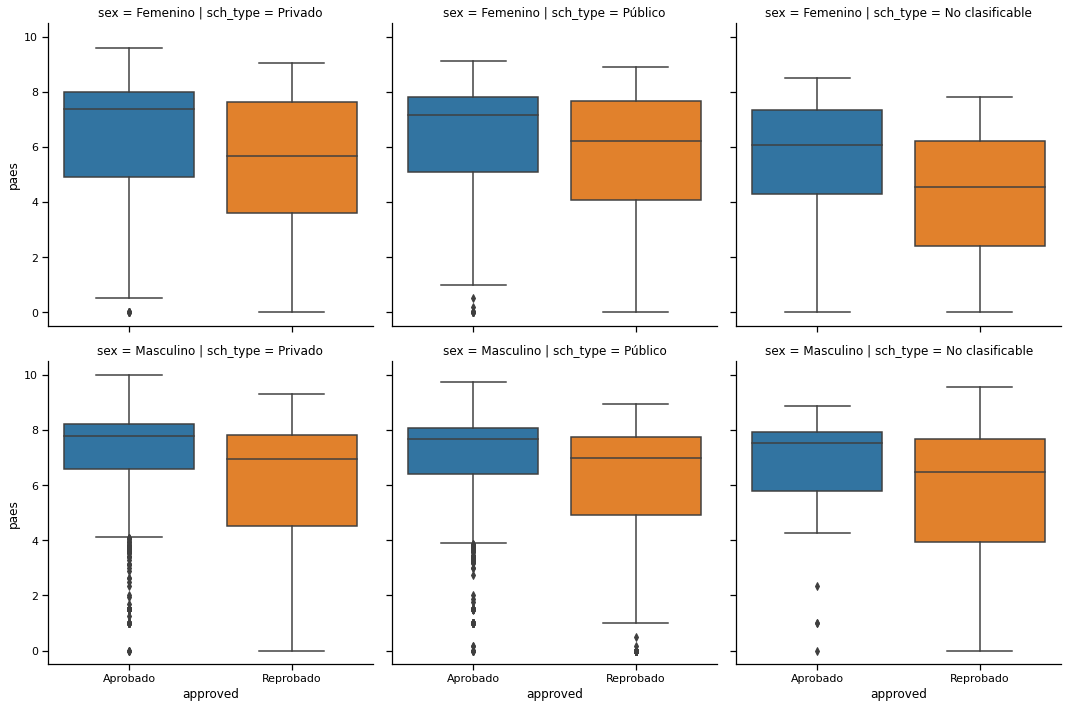

In [4]:
sns.set_context('notebook')
sns.catplot(x = 'approved',
           y = 'paes',
           data = data,
           kind = 'box',
           row = 'sex',
           col = 'sch_type')
plt.show()

In [5]:
input_data = data.drop(columns=not_relevant_cols)

X = input_data.drop(columns = 'approved')
y = input_data['approved']

In [6]:
X.head(3)

,sex,town,age,paes,major,faculty,VR,SR,AR,NA,MR,CSA,habits,sch_type
0,Femenino,Soyapango,23,5.52,Licenciatura en Idiomas con especialidad en la...,Facultad de CC. y Humanidades,75,15,20,5,45,5,5,Privado
1,Femenino,Soyapango,23,4.50,Licenciatura en Ciencias de la Comunicación,Facultad de CC. y Humanidades,75,20,15,50,15,5,1,Privado
2,Femenino,Soyapango,24,3.83,Licenciatura en Idiomas con especialidad en Tu...,Facultad de CC. y Humanidades,45,5,10,30,15,5,4,Público


In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Normalizer, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [8]:
lbl_encode = LabelEncoder()
y = lbl_encode.fit_transform(y)

In [9]:
pipe_num = Pipeline([
                    ('func_transf_num', FunctionTransformer(
                        lambda df: df[df.select_dtypes(include=['int64','float64']).columns.to_list()])),
                    ('normalizer', Normalizer())])
pipe_cat = Pipeline([
                    ('func_transf_cat', FunctionTransformer(
                        lambda df: df[df.select_dtypes(include='object').columns.to_list()])),
                    ('encoder', OneHotEncoder(sparse = False, handle_unknown='ignore'))])

In [10]:
pipe_union = FeatureUnion([('pipe_num',pipe_num),('pipe_cat',pipe_cat)])

In [11]:
X_fit = pipe_union.fit_transform(X)

In [12]:
pca = PCA()
pca.fit(X_fit)

PCA()

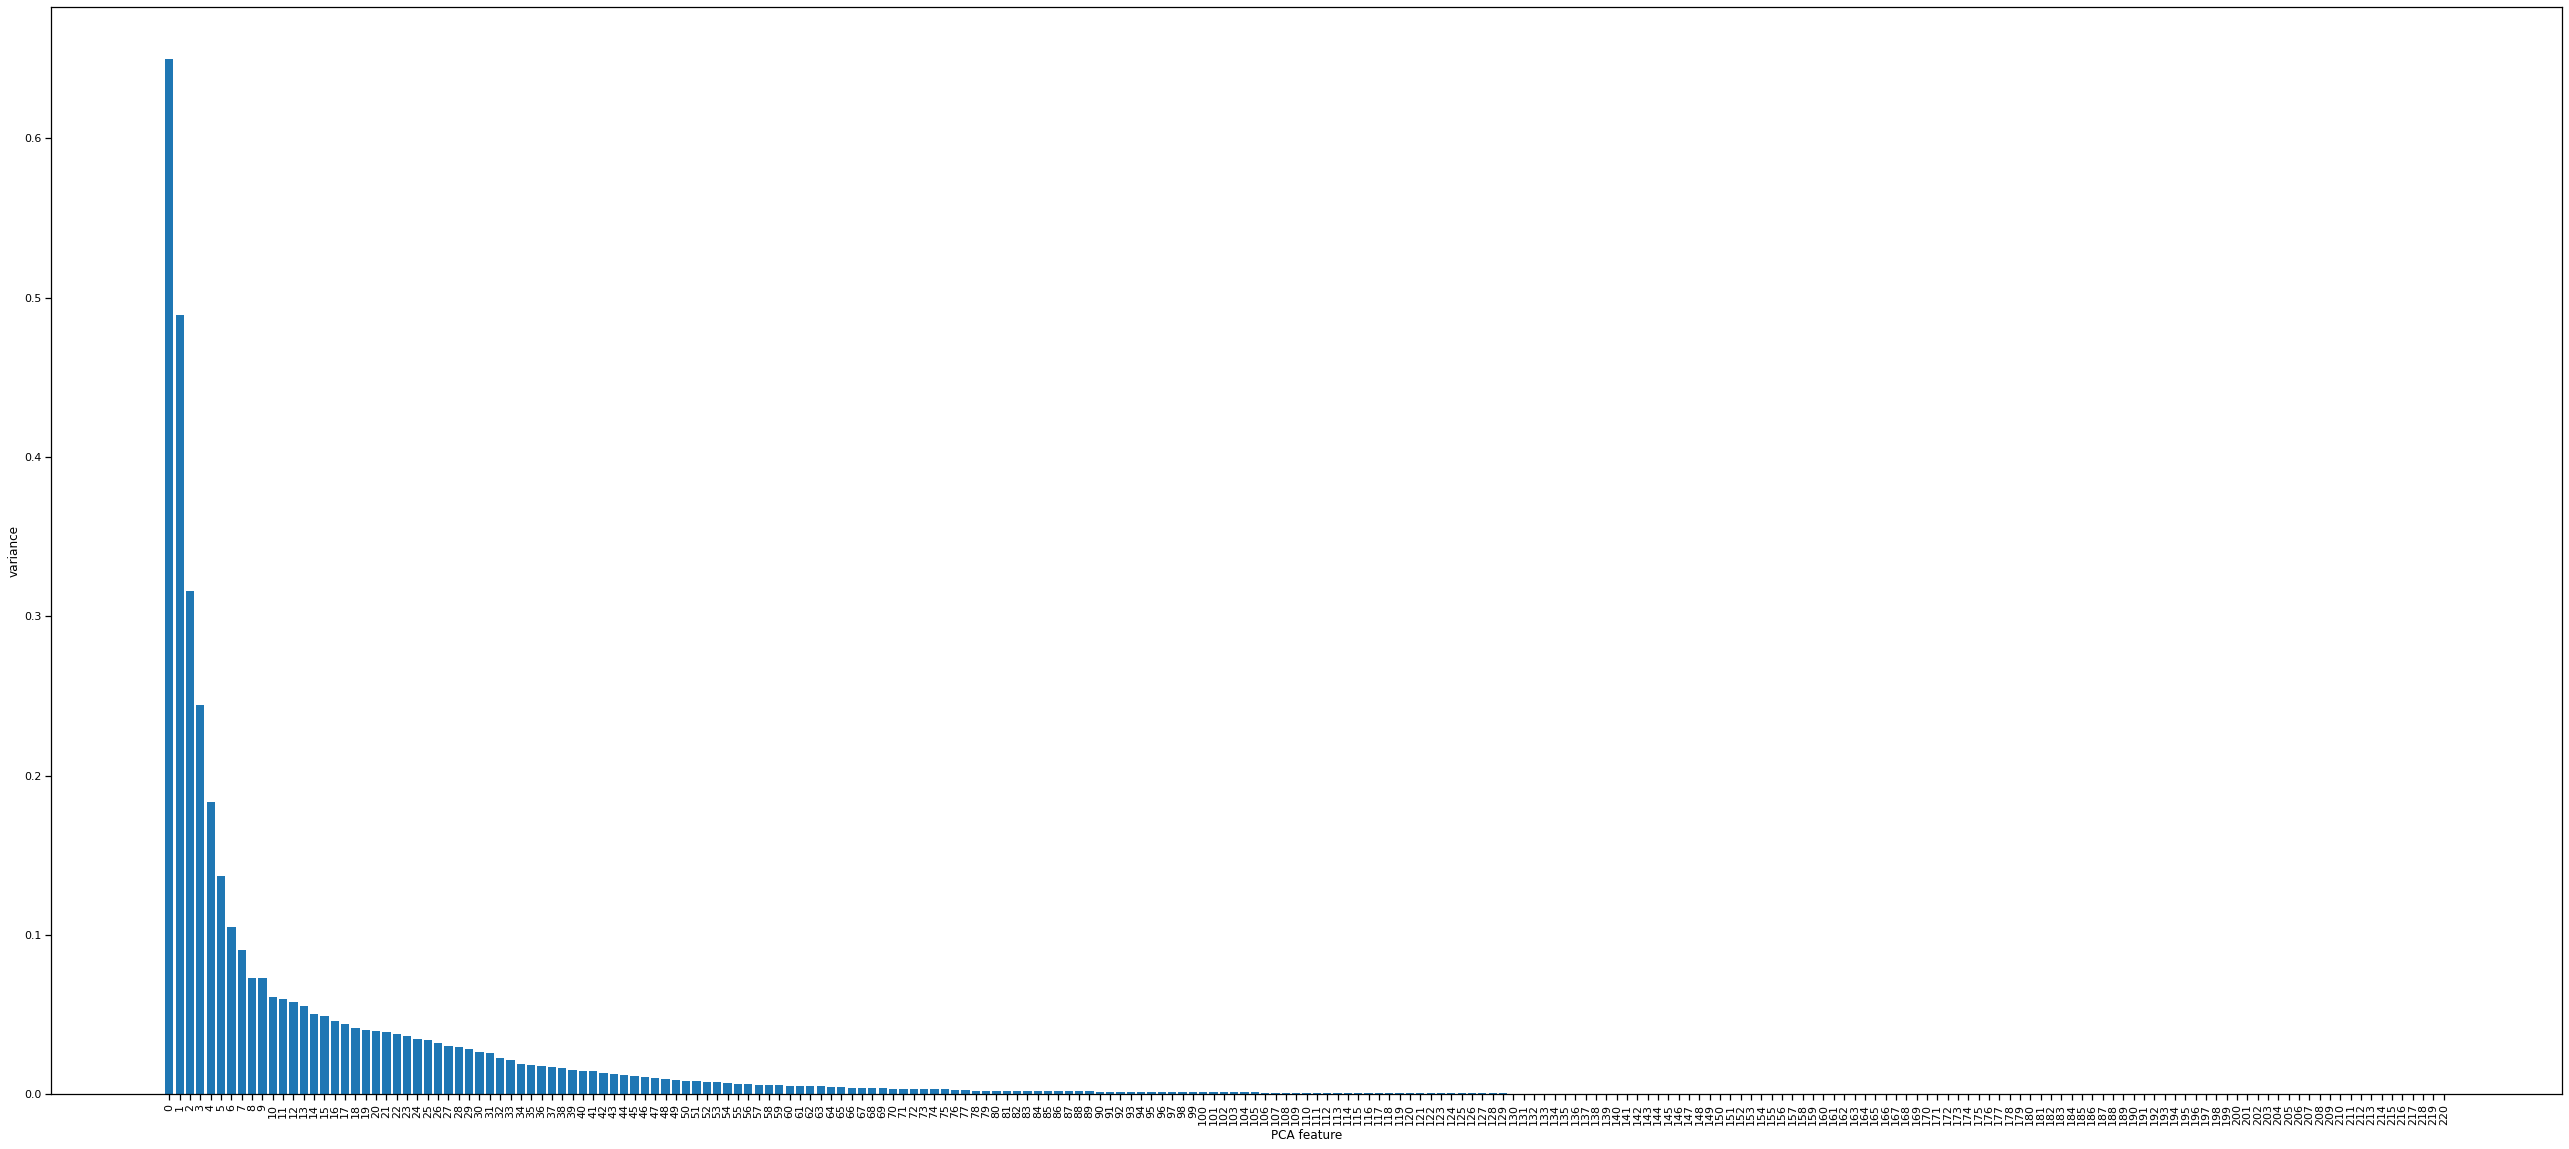

In [13]:
features = range(pca.n_components_)
fig, ax = plt.subplots()
ax.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features, rotation = 90)
fig.set_size_inches(45, 20)
fig.savefig('./pca components.png',dpi=600, bbox_inches = 'tight')
plt.show()

In [16]:
model = Pipeline([('pipe_union', pipe_union), ('classifier', LogisticRegression(solver='saga'))])
model.fit(X,y)

Pipeline(steps=[('pipe_union',
                 FeatureUnion(transformer_list=[('pipe_num',
                                                 Pipeline(steps=[('func_transf_num',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f7b8217f820>)),
                                                                 ('normalizer',
                                                                  Normalizer())])),
                                                ('pipe_cat',
                                                 Pipeline(steps=[('func_transf_cat',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f7b8217f790>)),
                                                                 ('encoder',
                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                   

In [17]:
model.score(X,y)

0.7374833110814419

In [22]:
import cloudpickle as pkl
file = open('./model.pkl', "wb")
pkl.dump(model, file)